Name : GAYATHRI A


Reg.No : 212221230028

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [2]:
dataset_train = pd.read_csv('trainset.csv')

In [4]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [6]:
train_set = dataset_train.iloc[:,1:2].values
type(train_set)
train_set.shape
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled.shape

(1259, 1)

In [7]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1199, 60)

In [8]:
length = 60
n_features = 1

In [10]:
model = Sequential()
model.add(layers.SimpleRNN(50,input_shape=(length,n_features)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
model.fit(X_train1,y_train,epochs=20, batch_size=32)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.0159e-04
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.5972e-04
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9815e-04
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.5156e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.3072e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.2466e-04
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0413e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1373e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.3252e-04
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.4816e-04
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.4053e-04
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1292e-04
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.5356e-04
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.2265e-04
Epoch 15/20
38/

In [14]:
dataset_test = pd.read_csv('testset.csv')

In [15]:
test_set = dataset_test.iloc[:,1:2].values
test_set.shape
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test.shape
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


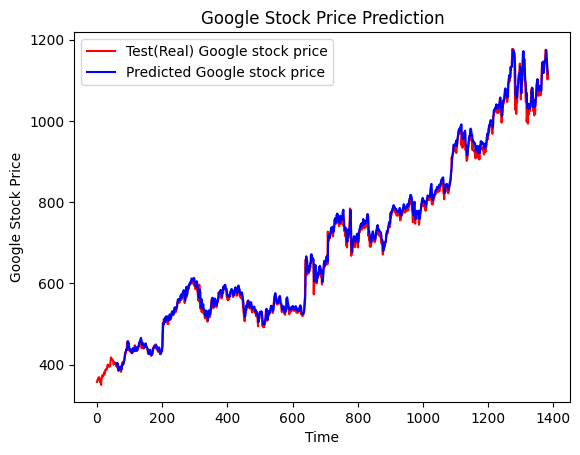

In [16]:
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()